# Introduction
The dataset can be found from Kaggle at [this link](https://www.kaggle.com/datasets/ruslankl/mice-protein-expression).

We import the dataset containing data of mouse protein expression levels. These are numeric (float) variables that hold protein concentrations in the mouse cells. There are three additional categorical variables:
- Genotype: Downs Syndrome vs control
- Treatment: Memantine vs Saline
- Behaviour: Stimulated vs Non-Stimulated

There are numerous questions that can be investigated using this dataset.
1. Can protein expression be used as predictors for genotype?
2. Can protein expression be used as predictors for behaviour?
3. Can genotype be used as a proxy for behaviour?
4. Can protein expression be used to predict treatment? (The answer should be NO as the mice should have been randomly assigned to treatment groups!)

Once the above 4 Cases have been briefly explored, I will focus then onto Case 1 and optimize the hyperparameters for the model.

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

In [38]:
'''Importing the dataset and dropping instances with null values'''
df = pd.read_csv('data.csv').dropna()

In [39]:
'''Inspcting columns'''
df.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [40]:
'''Dropping mouse ID as it is not useful'''
df = df.drop(['MouseID'], axis = 1)

In [41]:
'''Changing the Behaviour labels to something more readable'''
df['Behavior'] = df['Behavior'].apply(lambda x: 'Stimulated' if x=='C/S' else 'Not stimulated')

In [42]:
'''Changing the class label to something more readable'''
df['class'] = df['class'].apply(lambda x: 'Control' if x[0]=='c' else 'Downs')

In [43]:
df['Behavior']

75          Stimulated
76          Stimulated
77          Stimulated
78          Stimulated
79          Stimulated
             ...      
1045    Not stimulated
1046    Not stimulated
1047    Not stimulated
1048    Not stimulated
1049    Not stimulated
Name: Behavior, Length: 552, dtype: object

In [44]:
df['class']

75      Control
76      Control
77      Control
78      Control
79      Control
         ...   
1045      Downs
1046      Downs
1047      Downs
1048      Downs
1049      Downs
Name: class, Length: 552, dtype: object

In [45]:
df_control = df[df['class'] == 'Control']
df_downs = df[df['class'] == 'Downs']

# Model Selection
There are numerous things to consuider in model selection. The first is the fact that this is a classification problem, so our models must be chosen accordingly. The inputs to the model are all numeric (float) values. The key factor in model choice for this application is the high dimensionality of the dataset. There are roughly 70 proteins that are present in the dataset. I believe that the ideal model choice for this application is the Support Vector MAchine, due to their favorable performance in high dimensions.

# 1: Can Protein Expression be used as a Predictor of Genotype

Using the entire dataset

In [46]:
X = df.drop(['Genotype', 'Treatment', 'Behavior', 'class'], axis=1)
y = df['Genotype']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [48]:
clf1 = SVC().fit(X_train, y_train)

In [49]:
train_score = clf1.score(X_train, y_train)
test_score = clf1.score(X_test, y_test)

print(f"Train score is {round(train_score,3)}")
print(f"Test score is {round(test_score,3)}")

Train score is 0.819
Test score is 0.841


So yes, it seems that protein expression can be a strong predictor for genotype. 
The above took all proteins into account. This makes the dataset large and could be improved upon via the selective choice of only those proteins that showed correation to the genotype. 

# 2: Can protein expression be used as a predictor for behaviour?

In [50]:
X = df.drop(['Genotype', 'Treatment', 'Behavior', 'class'], axis=1)
y = df['Behavior']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [52]:
clf2 = SVC().fit(X_train, y_train)
train_score = clf2.score(X_train, y_train)
test_score = clf2.score(X_test, y_test)

print(f"Train score is {round(train_score,10)}")
print(f"Test score is {round(test_score,10)}")

Train score is 0.9951690821
Test score is 1.0


We can conclude that protein expression levels can be a very good predictor for mouse behaviour

# 3. Can genotype be used as a proxy for behavior?

In [53]:
X = pd.get_dummies(df['Genotype'])
y = df['Behavior']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [54]:
clf3 = LogisticRegression().fit(X_train, y_train)
train_score = clf3.score(X_train, y_train)
test_score = clf3.score(X_test, y_test)

print(f"Train score is {round(train_score,10)}")
print(f"Test score is {round(test_score,10)}")

Train score is 0.5289855072
Test score is 0.5869565217


We can conclude that there is some relationship between genotype and behaviour, but it is not very strong. 

# 4. Can protein expression be used to predict treatment?

In [55]:
X = df.drop(['Genotype', 'Treatment', 'Behavior', 'class'], axis=1)
y = df['Treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
clf4 = SVC().fit(X_train, y_train)
train_score = clf4.score(X_train, y_train)
test_score = clf4.score(X_test, y_test)

print(f"Train score is {round(train_score,10)}")
print(f"Test score is {round(test_score,10)}")

Train score is 0.8285024155
Test score is 0.847826087


We see that we can actually use protein expression as a predictor for the type of treatment that was recieved by the mouse. This is not a good sign as it can indicate that the random assignment of the mice to treatment groups was not sufficient and may in fact have introduced massive bias into the study.

# Optimizing the Case 1 Hyperparameters
We are again using protein expression to predict genotype, but this time we optimize the models


In [56]:
X = df.drop(['Genotype', 'Treatment', 'Behavior', 'class'], axis=1)
y = df['Genotype']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
C = np.linspace(0.01, 10, 100)
kernels = ['rbf', 'linear', 'poly', 'sigmoid']
results = dict(rbf=[], linear=[], poly=[], sigmoid=[])

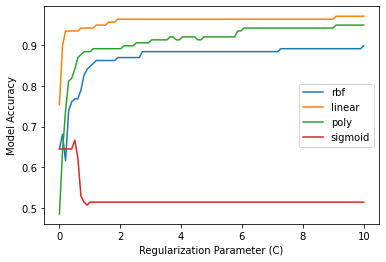

In [57]:
for kernel in kernels:
    for c in C:
        clf = SVC(C=c, kernel=kernel).fit(X_train, y_train)
        results[kernel].append(clf.score(X_test, y_test))
    
    plt.plot(C, results[kernel], label=kernel)

plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Model Accuracy')
plt.legend()

From the above graph we can clearly select the best combination of hyperparameters to optimize the model. We see that the sigmoid models perform poorly overall. The RBF models perfor much better but are still the 3rd worst overall. The polynomial and linear models were the top two models. We see that the linear model actually performs better than the polynomial across all values of C. We thus choose the linear model type as it is the simplest and we should aim to keep things simple where possible. 

Thus a linear SVC model with a regularization parameter of approximately 2 is the best performing model for this application. 